In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
df= pd.read_csv("Churn_Modelling.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [64]:
#removing irrelevant columns on df
col_to_drop = ["Surname", "RowNumber", "CustomerId"]
df = df.drop(columns = col_to_drop, axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [65]:
deep_df = df.copy(deep=True)

In [66]:
deep_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [67]:
#return numerical columns only for predictors
numerical_columns = [col for col in df.columns if (df[col].dtype=='int64' or df[col].dtype=='float64') and col != 'Exited']
print(list(numerical_columns))

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']


In [68]:
#trying to find outliers through mean and min, max
df[numerical_columns].describe().loc[['min','max', 'mean','50%'],:]

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
min,350.0000,18.0000,0.0000,0.000000,1.0000,0.0000,0.0000,11.580000
max,850.0000,92.0000,10.0000,250898.090000,4.0000,1.0000,1.0000,199992.480000
mean,650.5288,38.9218,5.0128,76485.889288,1.5302,0.7055,0.5151,100090.239881
50%,652.0000,37.0000,5.0000,97198.540000,1.0000,1.0000,1.0000,100193.915000


In [69]:
#selecting the row with minimum salary that is suspicious
df[df['EstimatedSalary'] == df['EstimatedSalary'].min()]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2362,709,Germany,Male,45,4,122917.71,1,1,1,11.58,1


In [70]:
percentages = []
for gen in list(df["Gender"].unique()):

    p = round((df["Exited"][df["Gender"]==gen].value_counts()[1]/df["Exited"][df["Gender"]==gen].value_counts().sum())*100 , 2)
    
    percentages.append(p)
    print(gen,"(% to exit) : ", p)

Female (% to exit) :  25.07
Male (% to exit) :  16.46


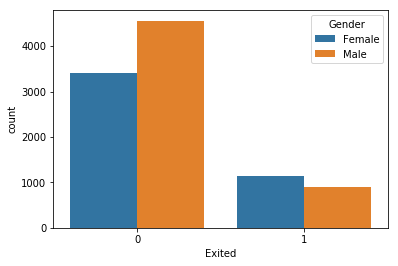

In [71]:
sns.countplot(x = "Exited", hue = "Gender", data= df)
#shows males are more likely to stay as when exit status is 0 they are more 

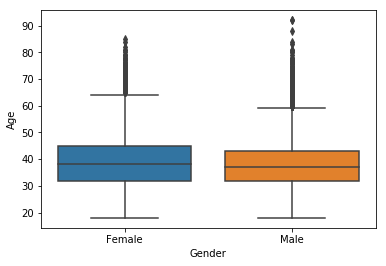

In [72]:
sns.boxplot(x = "Gender", y = "Age", data= df)

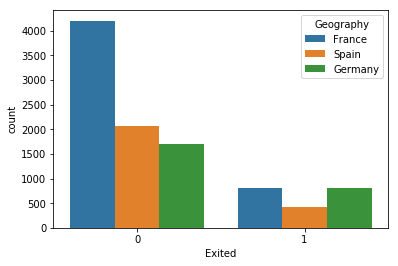

In [73]:
sns.countplot(x = "Exited", hue = "Geography", data= df)


In [74]:
percentages = []
for country in list(df["Geography"].unique()):
    
    p = round((df["Exited"][df["Geography"]==country].value_counts()[1]/df["Exited"][df["Geography"]==country].value_counts().sum())*100 , 2)
    
    percentages.append(p)
    print(country,"(% to exit) : ", p)


France (% to exit) :  16.15
Spain (% to exit) :  16.67
Germany (% to exit) :  32.44


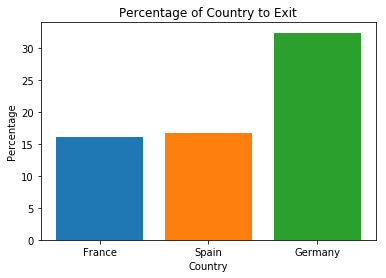

In [75]:
for i in range(len(percentages)):
    plt.bar(i, percentages[i])
plt.xticks((0,1,2), ('France', 'Spain', 'Germany'))
plt.xlabel("Country")
plt.ylabel("Percentage")
plt.title("Percentage of Country to Exit")
plt.show()

Text(0.5, 0, 'Age')

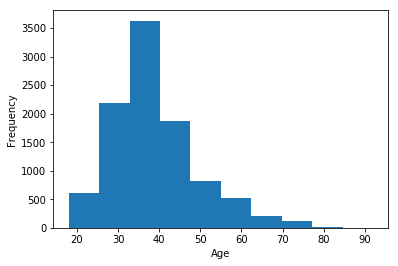

In [76]:
df["Age"].plot.hist()
plt.xlabel('Age')

Text(0.5, 1.0, 'People who did not Exit (Exited = 0)')

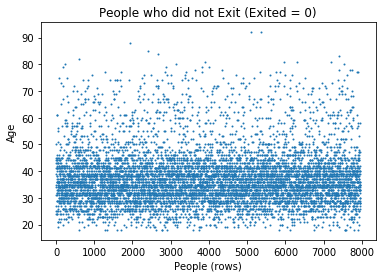

In [77]:
plt.scatter(x=range(len(list(df["Age"][df["Exited"]==0]))),y=df["Age"][df["Exited"]==0],s=1)
plt.ylabel("Age")
plt.xlabel("People (rows)")
plt.title("People who did not Exit (Exited = 0)")

Text(0.5, 1.0, 'People who Exited (Exited = 1)')

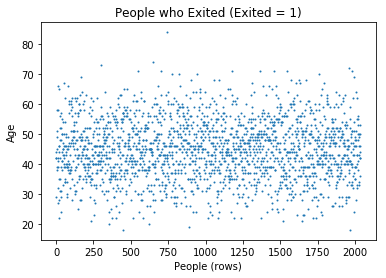

In [78]:
plt.scatter(x=range(len(list(df["Age"][df["Exited"]==1]))),y=df["Age"][df["Exited"]==1],s=1)
plt.ylabel("Age")
plt.xlabel("People (rows)")
plt.title("People who Exited (Exited = 1)")

In [79]:
age_bucket = df.groupby(pd.cut(df["Age"],bins=[10,20,30,40,50,60,70,80,90,100]))

In [80]:
age_bucket = round((age_bucket.sum()["Exited"] / age_bucket.size())*100 , 2)


In [81]:
print(age_bucket)

# percentage of customers in each age group that 'exited'

Age
(10, 20]      5.62
(20, 30]      7.61
(30, 40]     12.09
(40, 50]     33.97
(50, 60]     56.21
(60, 70]     31.42
(70, 80]      8.26
(80, 90]     10.00
(90, 100]     0.00
dtype: float64


Text(0.5, 1.0, 'Percentage of people in different Age Groups that exited')

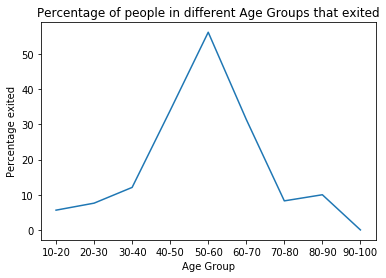

In [82]:
x = [str(i)+"-"+str(i+10) for i in range(10,91,10)]
plt.plot(x,age_bucket.values)
plt.xlabel("Age Group")
plt.ylabel("Percentage exited")
plt.title("Percentage of people in different Age Groups that exited")

In [83]:
df["Age"] = pd.cut(df["Age"],bins=[10,20,30,40,50,60,70,80,90,100])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,"(40, 50]",2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,"(40, 50]",1,83807.86,1,0,1,112542.58,0
2,502,France,Female,"(40, 50]",8,159660.80,3,1,0,113931.57,1
3,699,France,Female,"(30, 40]",1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,"(40, 50]",2,125510.82,1,1,1,79084.10,0


In [84]:
# dummy encoding the non-numeric columns

df = pd.get_dummies(df)
df.head()


,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,...,Gender_Male,"Age_(10, 20]","Age_(20, 30]","Age_(30, 40]","Age_(40, 50]","Age_(50, 60]","Age_(60, 70]","Age_(70, 80]","Age_(80, 90]","Age_(90, 100]"
0,619,2,0.00,1,1,1,101348.88,1,1,0,...,0,0,0,0,1,0,0,0,0,0
1,608,1,83807.86,1,0,1,112542.58,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,502,8,159660.80,3,1,0,113931.57,1,1,0,...,0,0,0,0,1,0,0,0,0,0
3,699,1,0.00,2,0,0,93826.63,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,850,2,125510.82,1,1,1,79084.10,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [85]:
df = df.drop(columns=["Geography_France","Gender_Female"],axis=1)

In [86]:
df = df.iloc[:,:-1]


In [87]:
df.head()

,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male,"Age_(10, 20]","Age_(20, 30]","Age_(30, 40]","Age_(40, 50]","Age_(50, 60]","Age_(60, 70]","Age_(70, 80]","Age_(80, 90]"
0,619,2,0.00,1,1,1,101348.88,1,0,0,0,0,0,0,1,0,0,0,0
1,608,1,83807.86,1,0,1,112542.58,0,0,1,0,0,0,0,1,0,0,0,0
2,502,8,159660.80,3,1,0,113931.57,1,0,0,0,0,0,0,1,0,0,0,0
3,699,1,0.00,2,0,0,93826.63,0,0,0,0,0,0,1,0,0,0,0,0
4,850,2,125510.82,1,1,1,79084.10,0,0,1,0,0,0,0,1,0,0,0,0


In [88]:
df.to_csv('Clean_data.csv')

## Modelling the Data

In [89]:
df = pd.read_csv('Clean_data.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Unnamed: 0           10000 non-null int64
CreditScore          10000 non-null int64
Tenure               10000 non-null int64
Balance              10000 non-null float64
NumOfProducts        10000 non-null int64
HasCrCard            10000 non-null int64
IsActiveMember       10000 non-null int64
EstimatedSalary      10000 non-null float64
Exited               10000 non-null int64
Geography_Germany    10000 non-null int64
Geography_Spain      10000 non-null int64
Gender_Male          10000 non-null int64
Age_(10, 20]         10000 non-null int64
Age_(20, 30]         10000 non-null int64
Age_(30, 40]         10000 non-null int64
Age_(40, 50]         10000 non-null int64
Age_(50, 60]         10000 non-null int64
Age_(60, 70]         10000 non-null int64
Age_(70, 80]         10000 non-null int64
Age_(80, 90]         10000 non-null int64
dtypes: float64(2), int64(18)
memory usage: 1.5 

,Unnamed: 0,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male,"Age_(10, 20]","Age_(20, 30]","Age_(30, 40]","Age_(40, 50]","Age_(50, 60]","Age_(60, 70]","Age_(70, 80]","Age_(80, 90]"
0,0,619,2,0.00,1,1,1,101348.88,1,0,0,0,0,0,0,1,0,0,0,0
1,1,608,1,83807.86,1,0,1,112542.58,0,0,1,0,0,0,0,1,0,0,0,0
2,2,502,8,159660.80,3,1,0,113931.57,1,0,0,0,0,0,0,1,0,0,0,0
3,3,699,1,0.00,2,0,0,93826.63,0,0,0,0,0,0,1,0,0,0,0,0
4,4,850,2,125510.82,1,1,1,79084.10,0,0,1,0,0,0,0,1,0,0,0,0


In [90]:
feat = df.drop(columns=['Exited'],axis=1)
label = df["Exited"]

In [91]:
from sklearn.model_selection import train_test_split


In [93]:
X_train, X_test, y_train, y_test = train_test_split(feat, label, test_size=0.3, random_state=42)

## Support Vector Machine Classifier

In [97]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


In [98]:
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.fit_transform(X_test)

In [99]:
support_vector_classifier = SVC(kernel='rbf')
support_vector_classifier.fit(X_train,y_train)
y_pred_svc = support_vector_classifier.predict(X_test)

In [100]:
from sklearn.metrics import confusion_matrix
cm_support_vector_classifier = confusion_matrix(y_test,y_pred_svc)
print(cm_support_vector_classifier,end='\n\n')


[[2355   61]
 [ 353  231]]



In [101]:
numerator = cm_support_vector_classifier[0][0] + cm_support_vector_classifier[1][1]
denominator = sum(cm_support_vector_classifier[0]) + sum(cm_support_vector_classifier[1])
acc_svc = (numerator/denominator) * 100
print("Accuracy : ",round(acc_svc,2),"%")

Accuracy :  86.2 %


In [102]:
#cross validation
from sklearn.model_selection import cross_val_score
cross_val_svc = cross_val_score(estimator = SVC(kernel = 'rbf'), X = X_train, y = y_train, cv = 10, n_jobs = -1)
print("Cross Validation Accuracy : ",round(cross_val_svc.mean() * 100 , 2),"%")

Cross Validation Accuracy :  85.23 %


## Random Forest Classifier

In [103]:
from sklearn.ensemble import RandomForestClassifier

In [104]:
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train,y_train)
y_pred_rfc = random_forest_classifier.predict(X_test)

c:\users\ckcheruiyot\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [105]:
cm_random_forest_classifier = confusion_matrix(y_test,y_pred_rfc)
print(cm_random_forest_classifier,end="\n\n")

[[2331   85]
 [ 352  232]]



In [106]:
numerator = cm_random_forest_classifier[0][0] + cm_random_forest_classifier[1][1]
denominator = sum(cm_random_forest_classifier[0]) + sum(cm_random_forest_classifier[1])
acc_rfc = (numerator/denominator) * 100
print("Accuracy : ",round(acc_rfc,2),"%")

Accuracy :  85.43 %


In [107]:
cross_val_rfc = cross_val_score(estimator=RandomForestClassifier(), X=X_train, y=y_train, cv=10, n_jobs=-1)
print("Cross Validation Accuracy : ",round(cross_val_rfc.mean() * 100 , 2),"%")

Cross Validation Accuracy :  84.34 %


## XGBoost Model Classifier

In [109]:
from xgboost import XGBClassifier

In [110]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train,y_train)
y_pred_xgb = xgb_classifier.predict(X_test)

In [111]:
cm_xgb_classifier = confusion_matrix(y_test,y_pred_xgb)
print(cm_xgb_classifier,end='\n\n')

[[2342   74]
 [ 330  254]]



In [112]:
numerator = cm_xgb_classifier[0][0] + cm_xgb_classifier[1][1]
denominator = sum(cm_xgb_classifier[0]) + sum(cm_xgb_classifier[1])
acc_xgb = (numerator/denominator) * 100
print("Accuracy : ",round(acc_xgb,2),"%")

Accuracy :  86.53 %


In [113]:
cross_val_xgb = cross_val_score(estimator=XGBClassifier(), X=X_train, y=y_train, cv=10, n_jobs=-1)
print("Cross Validation Accuracy : ",round(cross_val_xgb.mean() * 100 , 2),"%")

Cross Validation Accuracy :  85.4 %


# Deep Learning using TensorFlow

In [115]:
import tensorflow as tf

In [116]:
print(deep_df.info())
deep_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB
None


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [117]:
# separating the features and labels
deep_feat = deep_df.drop(columns=["Exited"],axis=1)
deep_label = deep_df["Exited"]

In [118]:
# first just take a look at all the columns
list(deep_feat.columns)

['CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

In [119]:
#getting categorical features
categorical_columns = [col for col in deep_feat.columns if len(deep_feat[col].unique())==2 or deep_feat[col].dtype=='O']

In [120]:
#getting continuous features
continuous_columns = [col for col in deep_feat.columns if len(deep_feat[col].unique())>2 and (deep_feat[col].dtype=='int64' or deep_feat[col].dtype=='float64')]

In [121]:
print("categorical columns : ", categorical_columns)
print("continuous columns : ", continuous_columns)

categorical columns :  ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
continuous columns :  ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']


In [122]:
# making a train test split
X_T, X_t, y_T, y_t = train_test_split(deep_feat, deep_label, test_size=0.3)

In [123]:
cols_to_scale = continuous_columns[:]
cols_to_scale.remove("Age")

In [124]:
# scaling the listed columns
scaler = StandardScaler()
X_T.loc[:,cols_to_scale] = scaler.fit_transform(X_T.loc[:,cols_to_scale])
X_t.loc[:,cols_to_scale] = scaler.fit_transform(X_t.loc[:,cols_to_scale])

c:\users\ckcheruiyot\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
c:\users\ckcheruiyot\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [125]:
categorical_object_feat_cols = [tf.feature_column.embedding_column(                                   
tf.feature_column.categorical_column_with_hash_bucket(key=col,hash_bucket_size=1000), dimension = len(deep_df[col].unique()))
 
for col in categorical_columns if deep_df[col].dtype=='O']

In [126]:
categorical_integer_feat_cols = [tf.feature_column.embedding_column(                 
tf.feature_column.categorical_column_with_identity(key=col,num_buckets=2),dimension = len(deep_df[col].unique()))
 
for col in categorical_columns if deep_df[col].dtype=='int64']

In [127]:
continuous_feat_cols = [tf.feature_column.numeric_column(key=col) for col in continuous_columns if col != "Age"]

In [128]:
age_bucket = tf.feature_column.bucketized_column(tf.feature_column.numeric_column(key="Age"), boundaries=[20,30,40,50,60,70,80,90])


In [129]:
feat_cols = categorical_object_feat_cols + \
            categorical_integer_feat_cols + \
            continuous_feat_cols + \
            [age_bucket]
# '\' is just an escape character to support operations in multiple lines.

In [130]:
input_fun = tf.estimator.inputs.pandas_input_fn(X_T,y_T,batch_size=50,num_epochs=1000,shuffle=True)
pred_input_fun = tf.estimator.inputs.pandas_input_fn(X_t,batch_size=50,shuffle=False)

In [131]:
DNN_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10], feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\CKCHER~1\\AppData\\Local\\Temp\\tmpu9w7noj1', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000023C8FF49748>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [132]:
DNN_model.train(input_fn=input_fun, steps=5000)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into C:\U

INFO:tensorflow:loss = 15.782669, step = 4701 (0.429 sec)
INFO:tensorflow:global_step/sec: 169.207
INFO:tensorflow:loss = 15.37163, step = 4801 (0.593 sec)
INFO:tensorflow:global_step/sec: 182.482
INFO:tensorflow:loss = 15.707855, step = 4901 (0.547 sec)
INFO:tensorflow:Saving checkpoints for 5000 into C:\Users\CKCHER~1\AppData\Local\Temp\tmpu9w7noj1\model.ckpt.
INFO:tensorflow:Loss for final step: 18.669683.


In [136]:
predictions = DNN_model.predict(pred_input_fun)


In [137]:
res_pred = list(predictions)
res_pred[0]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\CKCHER~1\AppData\Local\Temp\tmpu9w7noj1\model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


{'logits': array([-1.7651461], dtype=float32),
 'logistic': array([0.14614695], dtype=float32),
 'probabilities': array([0.853853  , 0.14614698], dtype=float32),
 'class_ids': array([0], dtype=int64),
 'classes': array([b'0'], dtype=object)}

In [138]:
y_pred = []
for i in range(len(res_pred)):
    y_pred.append(res_pred[i]["class_ids"][0])

In [139]:
from sklearn.metrics import classification_report
rep = classification_report(y_t,y_pred)

In [140]:
print(rep)


              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2396
           1       0.76      0.49      0.59       604

    accuracy                           0.87      3000
   macro avg       0.82      0.72      0.76      3000
weighted avg       0.86      0.87      0.85      3000

